In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [18]:
%matplotlib inline

In [ ]:
pheno_path = '/data1/abide/Pheno/existing_pheno.csv'
out_path = '/data1/abide/Pheno/nyu_pheno.csv'

In [ ]:
pheno = pd.read_csv(pheno_path)

In [ ]:
site_ind = (pheno['SITE_ID'] == 'NYU')

In [ ]:
site_pheno = pheno[site_ind]

In [ ]:
cov = 'SRS_RAW_TOTAL'
cov_index = pd.notnull(site_pheno.replace(-9999, np.nan)[cov])

In [ ]:
site_pheno.to_csv(out_path)

In [ ]:
np.sum(site_pheno['SEX'] == 2)

In [2]:
full_pheno = '/data1/abide/Pheno/glm_pheno.csv'
gphen = pd.read_csv(full_pheno)

In [11]:
mot = gphen['mean_fd']

In [23]:
# Group the pheno by site
grouped = gphen.groupby('site')
# Get the site names
site_names = grouped.groups.keys()
# Get a list of the ages in the sample by site
mot_list = [grouped.get_group(st)['mean_fd'].values for st in site_names]

In [24]:
len(site_names)

16

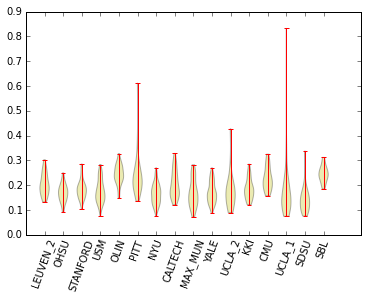

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)
violin_ind = np.arange(1,len(site_names)+1)
tmp = ax.violinplot(mot_list, violin_ind)
tmp = ax.set_xticks(violin_ind)
tmp = ax.set_xticklabels(site_names, rotation=70)

site
CALTECH     Axes(0.125,0.125;0.775x0.775)
CMU         Axes(0.125,0.125;0.775x0.775)
KKI         Axes(0.125,0.125;0.775x0.775)
LEUVEN_2    Axes(0.125,0.125;0.775x0.775)
MAX_MUN     Axes(0.125,0.125;0.775x0.775)
NYU         Axes(0.125,0.125;0.775x0.775)
OHSU        Axes(0.125,0.125;0.775x0.775)
OLIN        Axes(0.125,0.125;0.775x0.775)
PITT        Axes(0.125,0.125;0.775x0.775)
SBL         Axes(0.125,0.125;0.775x0.775)
SDSU        Axes(0.125,0.125;0.775x0.775)
STANFORD    Axes(0.125,0.125;0.775x0.775)
UCLA_1      Axes(0.125,0.125;0.775x0.775)
UCLA_2      Axes(0.125,0.125;0.775x0.775)
USM         Axes(0.125,0.125;0.775x0.775)
YALE        Axes(0.125,0.125;0.775x0.775)
Name: mean_fd, dtype: object

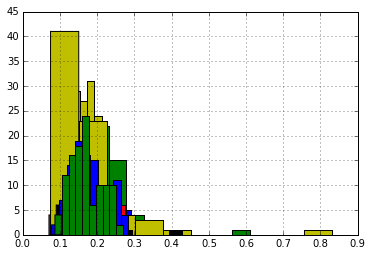

In [21]:
gphen.groupby('site')['mean_fd'].hist()

<IPython.core.display.Javascript object>


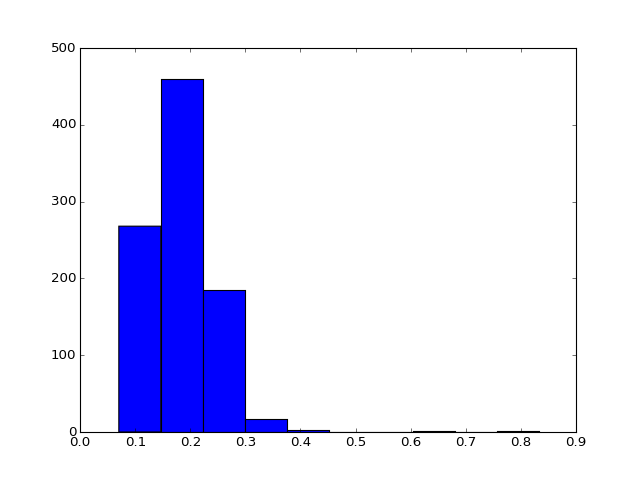

(array([ 268.,  460.,  185.,   17.,    3.,    0.,    0.,    1.,    0.,    1.]),
 array([ 0.07044972,  0.14662866,  0.22280761,  0.29898655,  0.37516549,
         0.45134444,  0.52752338,  0.60370232,  0.67988127,  0.75606021,
         0.83223915]),
 <a list of 10 Patch objects>)

In [10]:
plt.hist(mot.values)